# ML CLUSTERING

## Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import python_utils
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice

%matplotlib inline

In [2]:
%cd C:/Users/Tole 01/Desktop/Micromaster_Data_Science/Week-7-MachineLearning/weather

C:\Users\Tole 01\Desktop\Micromaster_Data_Science\Week-7-MachineLearning\weather


In [3]:
data = pd.read_csv('minute_weather.csv')

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [4]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [5]:
data.shape

(1587257, 13)

In [6]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


## Data Sampling

In [7]:
# We're gonna have the data whose rowID will be multiples of 10
sampled_df = data[(data.rowID % 10 == 0)]
sampled_df.shape

(158726, 13)

## Statistics

In [8]:
sampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_df[sampled_df.rain_accumulation == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df.rain_accumulation != 0].shape

(914, 13)

In [11]:
sampled_df[sampled_df.rain_duration == 0].shape

(157237, 13)

In [12]:
sampled_df[sampled_df.rain_duration != 0].shape

(1489, 13)

In [13]:
sampled_df[sampled_df.rain_accumulation != 0].merge(sampled_df[sampled_df.rain_duration != 0], on='rowID',how='inner').shape

(910, 25)

## Drop Columns and NaN

rain_duration and rain_accumulation has a lot of zeros on their data so we must delete them.

In [14]:
del sampled_df['rain_duration'] 
del sampled_df['rain_accumulation']

In [15]:
rows_before = sampled_df.shape[0]
sampled_df.dropna(inplace=True)
rows_after = sampled_df.shape[0]

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_10900\3936824532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.dropna(inplace=True)


In [16]:
# Number of dropped rows
rows_before - rows_after

46

In [17]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

## Features of Interest for the Clusters

In [18]:
features = ['air_pressure', 'air_temp','avg_wind_direction',
 'avg_wind_speed','max_wind_direction','max_wind_speed','relative_humidity']

In [19]:
select_df = sampled_df[features]
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [20]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


## Scale Data through StandardScaler

**Spanish**

StandardScaler es un objeto que recibe un DF a traves de fit_transform para escalarlo.

- Primero calcula cuanto del DF se debe normalizar
- Despues observa los datos y decide como es que los datos se van a escalar.

**English**

StandardScaler is an object that receives a DataFrame through fit_transform to scale it.

- First, it calculates how much of the DataFrame should be normalized.
- Then, it observes the data and decides how the data should be scaled."

In [21]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [22]:
X.shape

(158680, 7)

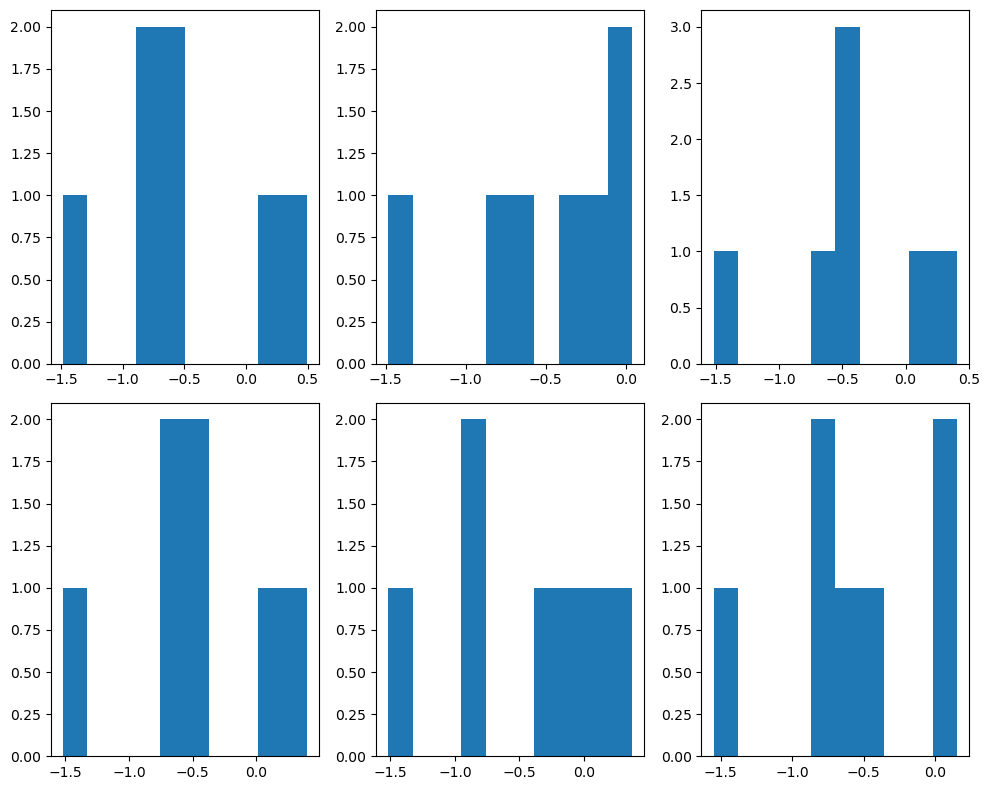

In [23]:
# Differences between columns via histograms
Fig, ax = plt.subplots(2,3, figsize=(10,8))

ax[0,0].hist(X[0])
ax[0,1].hist(X[1])
ax[0,2].hist(X[2])
ax[1,0].hist(X[3])
ax[1,1].hist(X[4])
ax[1,2].hist(X[5])

Fig.tight_layout()

## Clusters with K-means

**Spanish**

**KMeans()** es una funcion para generar clusters

- **n_clusters** define a traves del numero de clusters 
- **fit(X)** recibe la data escalada 

**English**

**KMeans()** is a function to generate clusters

- **n_clusters** defines the number of clusters.
- **fit(X)** receives the scaled data.

In [24]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print('model\n', model)

model
 KMeans(n_clusters=12)


In [33]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [34]:
kmeans

KMeans(n_clusters=12)

## Determine the Centroid of each Cluster

In [25]:
# use cluster_centers_ is an attribute that saves the center of each data
centers = model.cluster_centers_
centers

array([[ 0.13253131,  0.83637062,  1.41461547, -0.63948308,  1.67868894,
        -0.59047413, -0.71341662],
       [ 0.70876904,  0.46082172,  0.28724264, -0.53470332,  0.47425905,
        -0.5408862 , -0.76398931],
       [-1.18327857, -0.86670063,  0.44676479,  1.9876328 ,  0.53795034,
         1.94850416,  0.90520312],
       [ 0.0591344 , -0.79131861, -1.1975542 , -0.57036337, -1.04348575,
        -0.58498379,  0.88270638],
       [-0.16787159,  0.86603309, -1.31115741, -0.58926773, -1.1671838 ,
        -0.60460515, -0.63866663],
       [-0.21085002,  0.63416695,  0.40900488,  0.73316879,  0.51726676,
         0.67145382, -0.15221432],
       [ 0.2341746 ,  0.32128785,  1.88793388, -0.65175867, -1.55185621,
        -0.57669326, -0.28426063],
       [ 1.1914067 , -0.25296683, -1.15495479,  2.11500271, -1.05313761,
         2.23185734, -1.1352106 ],
       [-0.8391014 , -1.20346033,  0.37692934,  0.38192442,  0.47561701,
         0.36960326,  1.36307144],
       [ 0.23718516, -0.9986

In [26]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers (featuresUsed, DF_of_Centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    
    # Zip with a column called 'prediction' (Index and array of centers)
    Z = [np.append(A, index) for index, A in enumerate(DF_of_Centers)]
    
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P.prediction.astype(int)
    return P

In [27]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.132531,0.836371,1.414615,-0.639483,1.678689,-0.590474,-0.713417,0
1,0.708769,0.460822,0.287243,-0.534703,0.474259,-0.540886,-0.763989,1
2,-1.183279,-0.866701,0.446765,1.987633,0.537950,1.948504,0.905203,2
3,0.059134,-0.791319,-1.197554,-0.570363,-1.043486,-0.584984,0.882706,3
4,-0.167872,0.866033,-1.311157,-0.589268,-1.167184,-0.604605,-0.638667,4
5,-0.210850,0.634167,0.409005,0.733169,0.517267,0.671454,-0.152214,5
6,0.234175,0.321288,1.887934,-0.651759,-1.551856,-0.576693,-0.284261,6
7,1.191407,-0.252967,-1.154955,2.115003,-1.053138,2.231857,-1.135211,7
8,-0.839101,-1.203460,0.376929,0.381924,0.475617,0.369603,1.363071,8
9,0.237185,-0.998640,0.654656,-0.545687,0.843023,-0.528545,1.163825,9


## Parallel Coordinates

**Spanish**

Es un tipo de grafica que permite visualizar las diferentes graficas de los clusters. Se define a traves del metodo 
**parallel_coordinates()**

- **data** es el DF que contiene los datos para graficar. 
- **prediction** es el nombre de la columna del DF por el cual se hara un hue o clasificacion para la leyenda.
- **color** define los colores usados en las lineas.
- **marker** define el tipo de punto que se vera.

**English**

This is a type of graph that allows visualizing different graphs of clusters. It is defined through the method -**parallel_coordinates()**.

- **data** is the dataframe that contains the data to be plotted.
- **prediction** is the name of the dataframe column by which a hue or classification will be made for the legend.
- **color** defines the colors used in the lines.
- **marker** defines the type of point that will be displayed.

In [28]:
def parallel_plot(data):
    # Give them colors
    #my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(data)))
    
    # Create the figure size and change the graph's domain (y limit)
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    
    # Create the graphics
    parallel_coordinates(data, 'prediction', marker='o') #,color = my_colors,)

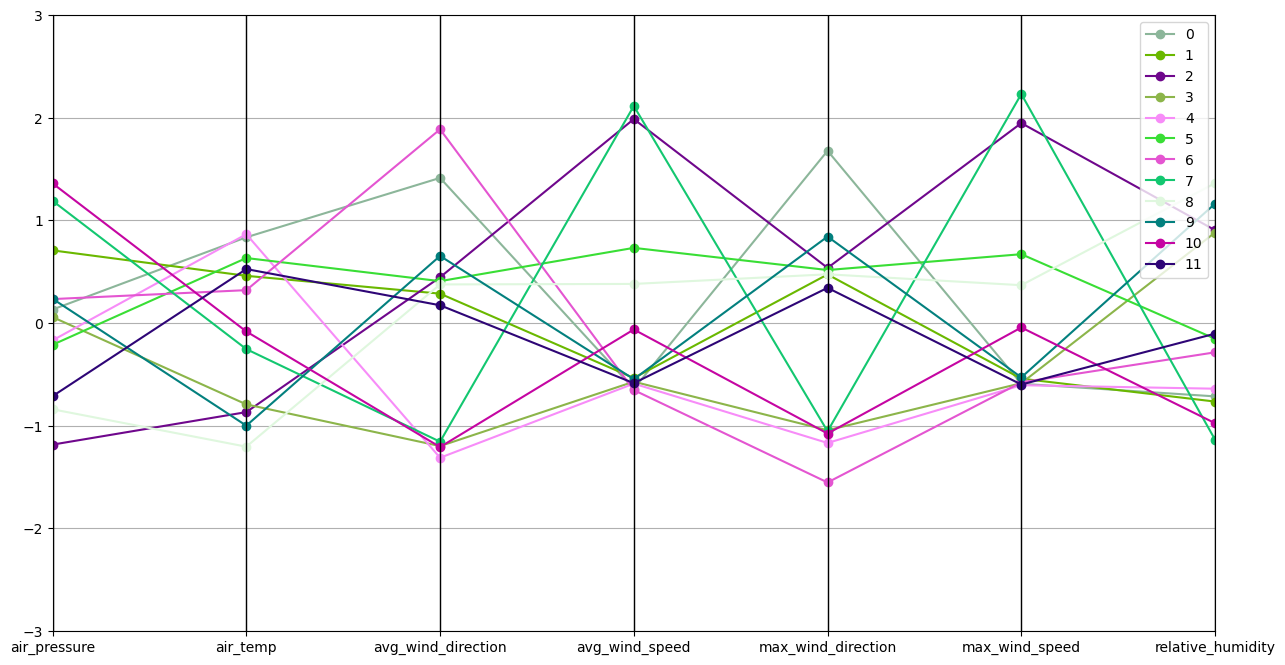

In [29]:
# Complete Parallel Plot
parallel_plot(P)

## Dry Days

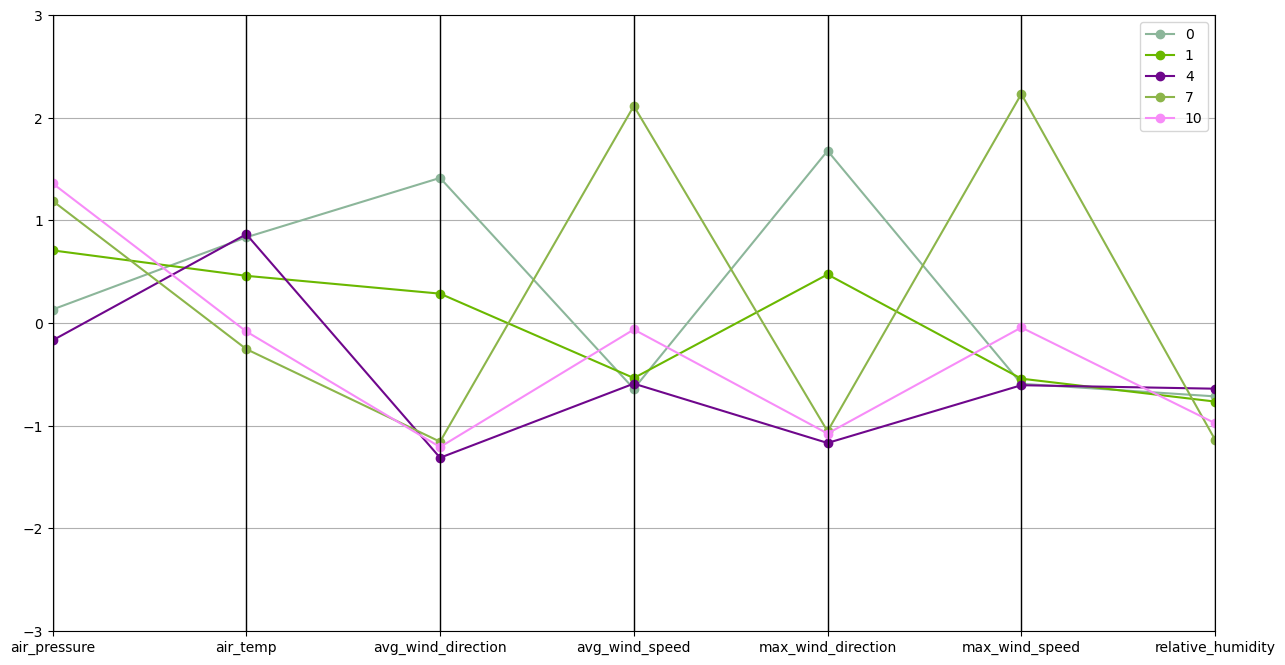

In [30]:
parallel_plot(P[P.relative_humidity < -0.5])

## Warm Days

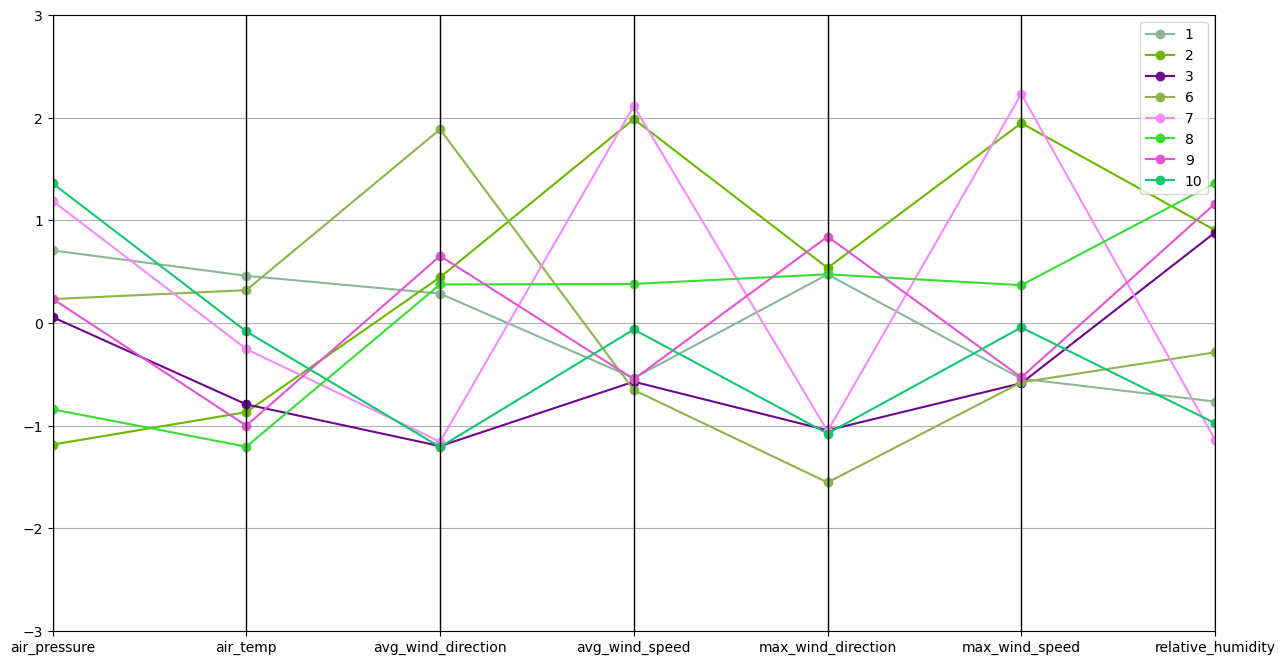

In [31]:
parallel_plot(P[P.air_temp < 0.5])

## Cool Days

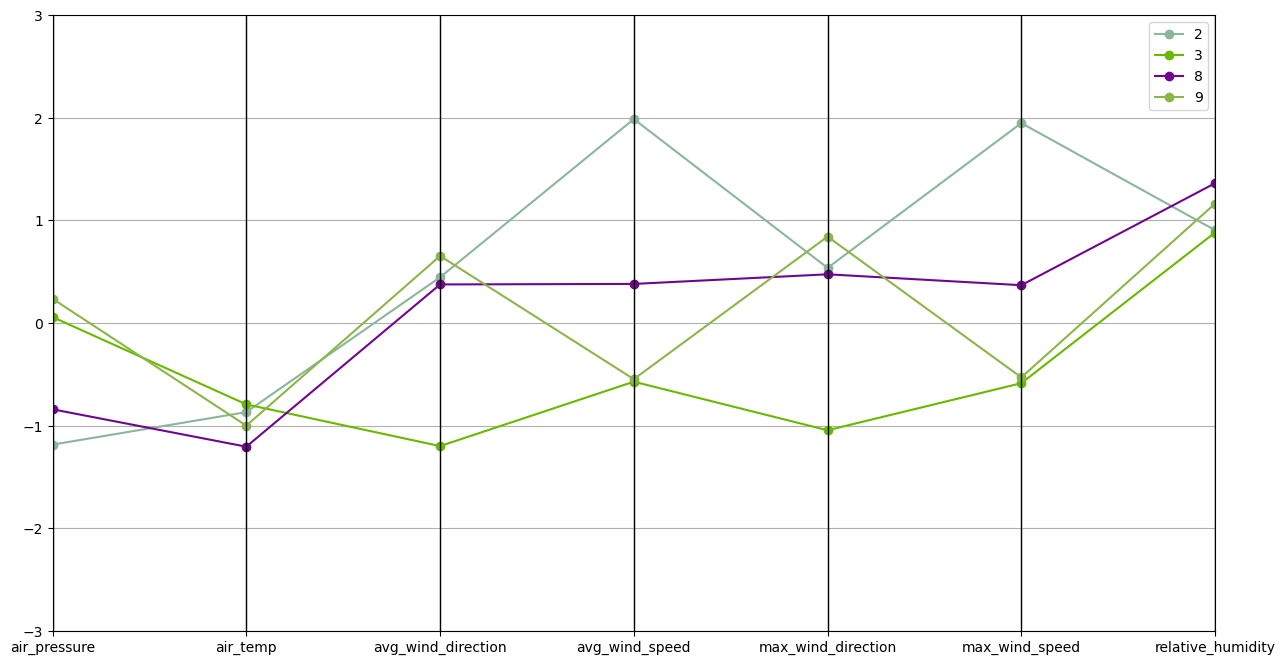

In [32]:
parallel_plot(P[(P.relative_humidity > 0.5) & (P.air_temp < 0.5)])